In [1]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess

In [2]:
subprocess.call("awk 'NF == 1 {print $1}' 1000microstates/2500lag/5states/macrostate_3.ndx > tmp",shell=True)
macrostate_traj1000 = np.loadtxt('tmp',dtype=int)
subprocess.call('rm -rfv tmp',shell=True)

subprocess.call("awk 'NF == 1 {print $1}' macrostate_3.ndx > tmp",shell=True)
macrostate_traj = np.loadtxt('tmp',dtype=int)
subprocess.call('rm -rfv tmp',shell=True)

0

In [3]:
len(macrostate_traj)

895636

In [10]:
roll = np.load('Roll.npy')

In [7]:
twist = np.rad2deg(np.load('Twist.npy'))

In [8]:
twist[macrostate_traj-1].min()

29.188148850303868

In [12]:
roll_plus = []
roll_minus = []
roll_pm = []
roll_mp = []
for k,i in enumerate(roll[macrostate_traj-1]):
    if ((i[0] <= 0 ) and ( i[1] <= 0 )):
        roll_plus.append(k)
    elif ((i[0] >= 0) and (i[1] >= 0)): 
        roll_minus.append(k)
    elif ((i[0] >= 0) and (i[1] <= 0)):
        roll_pm.append(k)
    elif ((i[0] <= 0) and (i[1] >= 0)):
        roll_mp.append(k)
    else:
        print('wtf?')
print(len(roll[macrostate_traj-1]))
print(len(roll_minus) + len(roll_plus) + len(roll_pm) + len(roll_mp))
print(len(roll_minus),len(roll_plus),len(roll_pm),len(roll_mp))

895636
895636
467303 385694 31814 10825


In [46]:
roll3 = roll[macrostate_traj-1]

In [57]:
dummy = roll_pm

In [58]:
roll3[dummy].shape

(137900, 2)

In [59]:
#Further subdivide the pm state into +/- and -/+

roll_pm = []
roll_mp = []

for k,i in enumerate(roll3[dummy]):
    if ((i[0] >= 0) and (i[1]) <= 0 ):
        roll_pm.append(dummy[k])
    elif ((i[0] <= 0) and (i[1]) >= 0 ): 
        roll_mp.append(dummy[k])
    else:
        print('wtf?',i)
        
print(len(roll[macrostate_traj-1]))
print(len(roll_minus) + len(roll_plus) + len(roll_pm) + len(roll_mp))

1023278
1023278


In [60]:
len(roll_pm)

123818

In [50]:
for i in roll3:
    if i[0] <=0 and i[1] >= 0:
        print(i)

[-0.52763456  0.5163148 ]
[-0.5762668   0.87850572]
[-0.04339161  0.50864275]
[-0.31065119  0.3034542 ]
[-0.7472262   0.55027309]
[-0.27811866  1.09768193]
[-1.04167785  0.45716359]
[-0.50370226  0.71437144]
[-0.47932039  0.51622734]
[-0.44148448  0.45935731]
[-0.37290272  0.43434307]
[-0.58335614  0.25969578]
[-0.67838184  0.59091839]
[-0.38396352  0.38613544]
[-0.98748328  0.42789301]
[-0.95667054  0.25997188]
[-1.0239382   0.30406193]
[-0.9767184   0.56825931]
[-1.09572839  0.66509453]
[-0.8420218   0.33275954]
[-1.18485685  0.76640995]
[-1.16239523  1.25968828]
[-1.4823453   0.33438963]
[-1.13939193  0.12572961]
[-1.26862342  0.35751268]
[-1.28200135  0.30836018]
[-1.06278098  0.33896161]
[-0.91530533  0.3997714 ]
[-0.55034966  0.46057967]
[-0.38443523  0.34964704]
[-1.50484477  3.06626227]
[-1.21940955  3.13192654]
[-1.11580296  0.69141395]
[-0.93895243  0.46687843]
[-1.58568869  0.4767243 ]
[-1.22814554  0.88331091]
[-1.22273711  0.9276594 ]
[-1.01583663  0.76732799]
[-1.04481138

[-1.06487709  0.57426641]
[-1.0645603   0.62351153]
[-0.91147216  0.54647383]
[-1.40807631  0.37078885]
[-0.98097676  0.67667684]
[-1.07410145  1.04171252]
[-0.98862568  0.76569272]
[-1.03275778  1.02731947]
[-1.32453395  0.90557895]
[-1.19586732  0.70307385]
[-1.30546935  0.93457108]
[-1.34650761  0.82930203]
[-1.44144484  0.83600103]
[-1.55878684  1.07060517]
[-1.52283246  0.83966038]
[-1.58343221  0.80985266]
[-1.10582976  0.82199879]
[-1.16194749  1.056611  ]
[-1.72545132  0.87383296]
[-1.7523667   0.76988201]
[-1.59916247  0.68490658]
[-1.46791936  1.0876782 ]
[-1.46410971  0.90781115]
[-1.61918151  0.83391427]
[-1.91334122  0.69906078]
[-1.29284725  1.18550338]
[-1.34924743  0.98538395]
[-1.29308597  0.85345985]
[-1.83809465  1.02023973]
[-1.90654811  0.40618819]
[-1.60460182  0.33753243]
[-1.5720244   0.70849558]
[-1.54266971  0.37508362]
[-0.92158832  0.74944202]
[-0.85408765  0.84689131]
[-1.06329181  0.58279391]
[-1.35831445  0.73312445]
[-1.48881409  0.94731409]
[-1.30809516

[-1.30816669  0.47469558]
[-1.37990274  0.29550282]
[-1.21438877  0.38915217]
[-1.10289424  0.58705817]
[-1.08955541  0.72115457]
[-0.72895097  0.34207311]
[-1.22372341  0.06571344]
[-1.45082567  0.34238374]
[-1.2149745   0.38653094]
[-0.56345239  0.16175332]
[-1.19629823  0.28132001]
[-0.91145988  0.75840035]
[-0.85248222  0.75680644]
[-0.86631514  0.80603667]
[-0.54078427  1.13949594]
[-0.86600071  1.12376934]
[-0.53595845  0.56893629]
[-0.85780721  1.00639004]
[-0.35976887  1.12201506]
[-0.29103302  0.97374798]
[-0.9460437   1.01435623]
[-0.83945533  1.20805345]
[-0.84278038  1.08960671]
[-0.66177316  1.06367126]
[-0.90895482  1.03343577]
[-0.64587844  1.07714587]
[-0.00077154  0.7182982 ]
[-0.16244297  1.0975772 ]
[-0.7464135  0.7936912]
[-0.72660357  0.76777046]
[-0.3351902  0.9282439]
[-0.11938184  1.00944771]
[-0.25859779  0.93436224]
[-0.45055305  0.71613237]
[-0.18506587  0.73633274]
[-0.41606004  0.95912556]
[-0.2289833   0.90000912]
[-0.10117581  0.75713415]
[-0.43870692  0.

[-0.09871432  0.79320357]
[-0.46773444  0.57735721]
[-0.78701328  0.90378242]
[-0.30437889  0.8130024 ]
[-0.47070379  0.62309831]
[-0.68500429  1.20721765]
[-0.56790556  0.74534653]
[-0.80546997  0.98689807]
[-0.34205251  0.72639538]
[-0.32736183  0.95725896]
[-0.46807222  0.58370503]
[-0.67510049  0.97551519]
[-0.53469857  0.66618304]
[-0.68546956  0.65143663]
[-0.57104734  0.99806221]
[-0.54750059  0.91940226]
[-0.49020277  0.68427598]
[-0.81929592  1.07697815]
[-0.94821248  0.75559502]
[-0.3914118   0.58668749]
[-0.31116532  0.93942301]
[-0.863629    0.56607677]
[-0.56188206  0.7071166 ]
[-0.56255296  0.67178565]
[-0.5955794   0.59346605]
[-0.63863529  0.71160567]
[-0.53580414  0.80711776]
[-0.69687263  1.06664686]
[-0.59524364  0.89261147]
[-0.80804581  0.99044646]
[-0.71942161  0.78342526]
[-0.89595424  0.67783092]
[-0.60331657  1.17947405]
[-0.86573242  1.13198842]
[-0.48878293  0.44621945]
[-0.81506505  1.08767421]
[-0.87946517  0.88063506]
[-0.75396892  0.83503528]
[-0.74933705

[-0.10286709  1.15035295]
[-0.25074814  0.81549925]
[-0.06981385  0.85485094]
[-0.47080349  0.76343563]
[-0.14195023  0.84617291]
[-0.15306683  0.5995874 ]
[-0.33971478  0.38396652]
[-0.55737997  0.61503078]
[-0.41025966  0.63079464]
[-0.28122434  0.73475342]
[-0.0741636   0.60251464]
[-0.16461779  0.80936191]
[-0.54783381  0.82499954]
[-0.39851205  0.90551178]
[-0.61238761  0.53144884]
[-0.64877168  0.84230832]
[-0.10520888  0.99483082]
[-0.36893478  1.01480984]
[-0.28134084  1.16195219]
[-0.15257772  0.82834625]
[-0.07477363  0.90010731]
[-0.01177736  0.58001462]
[-0.16011764  0.83907375]
[-0.06742722  0.70310698]
[-0.09794523  0.74533325]
[-0.24530718  0.87525363]
[-0.17968109  0.88263134]
[-0.14524075  0.58031645]
[-0.52051464  0.78241052]
[-0.47470841  1.22934979]
[-0.01436598  0.56346279]
[-0.28950036  0.97998126]
[-0.22402803  0.50547496]
[-0.34617566  0.92262859]
[-0.21832968  0.8428448 ]
[-0.78561637  0.53148788]
[-0.09691579  0.53446405]
[-0.04356748  0.67946004]
[-0.33011871

[-0.05827394  1.20196327]
[-0.24324848  0.84876241]
[-0.25227612  0.65681974]
[-0.12301322  0.42863673]
[-0.63980749  0.73832759]
[-0.28132972  0.57900227]
[-0.50322846  0.92517101]
[-0.21760603  0.79440268]
[-0.49744954  0.54636341]
[-0.54948962  0.96585739]
[-0.07731388  1.01104068]
[-0.41861029  0.92536562]
[-0.06938847  0.7419725 ]
[-0.32453202  0.75053418]
[-0.08474575  0.52808126]
[-0.41501917  0.56187649]
[-0.3996199   0.57335932]
[-0.49554066  0.76375129]
[-0.28720621  0.46143005]
[-0.39634932  0.64744077]
[-0.35214837  0.1743479 ]
[-0.11782074  0.86565392]
[-0.20882582  0.58425092]
[-0.35507841  0.40109679]
[-0.30481449  0.84770049]
[-0.3610489   0.76584976]
[-0.40899324  0.49480172]
[-0.27158098  0.14503454]
[-0.37578856  0.74283919]
[-0.65777335  0.89116276]
[-0.56637399  0.16675952]
[-0.26659265  0.75729245]
[-0.51025339  0.72792852]
[-0.26687888  0.59795887]
[-0.13250271  0.91828982]
[-0.12297259  0.591347  ]
[-0.4386597   0.73922119]
[-0.24310419  0.67413266]
[-0.34844208

[-0.18820954  0.69468999]
[-0.03516231  0.96856193]
[-0.3583302   0.88106456]
[-0.622946    0.98805683]
[-0.08507439  1.38412517]
[-0.21404835  0.97698869]
[-0.25781114  1.03330047]
[-0.5076891   0.89300732]
[-0.62191353  0.86137874]
[-0.55918706  0.87547932]
[-0.87509863  0.73421012]
[-0.84589194  0.60420484]
[-0.55241738  0.90712182]
[-0.58689238  0.87041221]
[-0.43849968  0.76302897]
[-0.63677874  0.74128231]
[-0.30264089  0.67245516]
[-0.45137685  0.89243627]
[-0.51783368  0.87154096]
[-0.34493275  0.86333509]
[-0.68104079  0.86908634]
[-0.50155316  0.68246742]
[-0.57054196  0.96858553]
[-0.18847271  1.20724516]
[-0.45192816  1.11458053]
[-0.6284202   0.71780231]
[-0.70738679  1.04251988]
[-0.55381259  0.96088428]
[-0.33791545  0.81552499]
[-0.40573415  0.69288793]
[-0.80391022  0.88159913]
[-0.69831602  0.6233674 ]
[-0.5567723   0.51198012]
[-0.10318321  0.68776018]
[-0.42844964  0.63225501]
[-0.66347398  0.43888288]
[-0.35111583  0.75777377]
[-0.4760647   1.16552268]
[-0.48979788

[-0.66626014  0.58556856]
[-0.16401561  0.48555675]
[-0.57453055  0.5668382 ]
[-0.68540694  0.54318091]
[-0.36313807  0.16692501]
[-0.58693149  0.59909506]
[-0.62775337  0.87473661]
[-0.624669    0.94953577]
[-0.69944938  0.53444674]
[-0.70107897  0.79779483]
[-0.80093339  0.94493459]
[-0.25662517  0.87747377]
[-0.46466517  0.7443666 ]
[-0.74466031  0.93542883]
[-0.38751681  0.67961622]
[-0.67859237  0.73106248]
[-0.55746079  0.8751747 ]
[-0.65229067  0.76572055]
[-0.32916662  0.82813606]
[-0.58102313  1.05419382]
[-0.41297453  0.86759102]
[-0.20661789  0.64502572]
[-0.56533049  0.83925704]
[-0.16918579  0.51039725]
[-0.69464845  0.60485249]
[-0.30009288  0.60841814]
[-0.05304201  0.83187217]
[-0.19527758  0.64853468]
[-0.23594078  0.21473313]
[-0.05236101  0.52144752]
[-0.16524196  0.77233447]
[-0.05326362  0.76534225]
[-0.09881472  0.55704139]
[-0.25460328  0.63265786]
[-0.04242918  0.28158049]
[-0.09362065  0.51339737]
[-0.15120684  0.81123677]
[-0.30186501  0.85415482]
[-0.49780926

[-0.33386649  0.60553893]
[-0.51217425  0.77542165]
[-0.47831558  0.4530373 ]
[-0.57002166  0.45594092]
[-0.15086351  1.06475134]
[-0.06415662  0.60170932]
[-0.35720099  0.57243901]
[-0.56345062  0.47910491]
[-0.33547196  0.58097221]
[-0.16304156  0.21164656]
[-0.13386719  0.53918424]
[-0.23024234  0.43306803]
[-0.30689856  0.17460991]
[-0.53985984  0.411086  ]
[-0.15579535  0.43106095]
[-0.12635709  0.56728011]
[-0.22825099  1.08670516]
[-0.16064978  0.71033305]
[-0.29414964  0.72440385]
[-0.10433839  0.72098223]
[-0.26528855  1.02676887]
[-0.13616281  0.98449105]
[-0.26050131  0.63397393]
[-0.34573657  0.74185118]
[-0.11667672  1.14227988]
[-0.20232455  0.79481953]
[-0.23575979  0.98378256]
[-0.04302914  0.65773915]
[-0.35080706  1.00193915]
[-0.20662551  0.730222  ]
[-0.27436403  0.83578203]
[-0.07506421  0.60715682]
[-0.10169995  1.11848925]
[-0.04174473  0.59649305]
[-0.09817965  0.62337652]
[-0.22410046  0.93667632]
[-0.08676668  0.82660881]
[-0.63305056  0.71751383]
[-0.28653836

[-0.7959037   1.20400904]
[-0.14606329  1.2102839 ]
[-0.61082792  1.00825056]
[-0.75348383  0.95596991]
[-0.85735894  0.78538057]
[-0.74858751  0.43916368]
[-0.65131176  0.69728063]
[-0.74063547  1.10728229]
[-0.66910717  0.86812309]
[-0.31956904  1.03506749]
[-0.1452885   0.86059635]
[-0.11827528  1.05580839]
[-0.49392609  0.9064746 ]
[-0.37438891  0.91513233]
[-0.58559033  0.8305182 ]
[-0.41225731  0.63243583]
[-0.61487697  1.02524773]
[-0.20200495  0.68513678]
[-0.02000048  1.23650953]
[-0.15420064  0.85521685]
[-0.2165841   0.92033034]
[-0.30480603  0.42265322]
[-0.24887376  0.94631756]
[-0.11632259  0.89396936]
[-0.30779584  0.74829216]
[-0.19164329  0.82405299]
[-0.48590581  0.77564164]
[-0.21585977  0.89798982]
[-0.22825537  0.64213575]
[-0.10267452  0.80280627]
[-0.09636109  0.83022077]
[-0.16544328  0.71340495]
[-0.23421953  0.7752766 ]
[-0.0465952   0.58843513]
[-0.24648415  0.71002947]
[-0.23724962  0.51450999]
[-0.34206848  0.65291331]
[-0.14978356  1.02066849]
[-0.13084317

[-0.05340093  0.7634526 ]
[-0.54379211  1.03432176]
[-0.73153248  0.50682435]
[-0.47410194  0.91791761]
[-0.38382167  1.00960241]
[-0.46202904  0.74490444]
[-0.42668266  1.34868593]
[-0.5618992   0.99094124]
[-0.78302006  1.21139849]
[-0.84210949  1.05003039]
[-0.56703733  0.81522577]
[-0.79092316  0.81083613]
[-0.78171779  1.27192033]
[-0.79801125  1.02166423]
[-0.41205089  1.19317357]
[-0.37041505  1.12759051]
[-0.34057354  0.85983046]
[-0.60833555  1.10296536]
[-0.35583465  1.02543999]
[-0.50099635  0.64161706]
[-0.38938395  0.99845748]
[-0.28941895  1.11395137]
[-0.65275588  0.96897332]
[-0.58681214  0.99340387]
[-0.1765006   0.66206236]
[-0.29200232  1.07641795]
[-0.46754776  0.92532925]
[-0.40760547  0.62102462]
[-0.02839158  0.91670549]
[-0.62591218  0.65457001]
[-0.45019316  0.99921801]
[-0.47348818  0.87875915]
[-0.31536319  0.87418872]
[-0.23476041  1.12358038]
[-0.29450039  0.92993915]
[-0.08520538  0.72133282]
[-0.36218727  0.94196999]
[-0.39485126  0.91949845]
[-0.18119739

[-0.22715149  0.68582253]
[-0.48655326  0.93022269]
[-0.41931867  0.86938547]
[-0.05821507  0.7788629 ]
[-0.09824892  0.82605281]
[-0.26283191  0.5947683 ]
[-0.11710174  0.61448274]
[-0.05585893  0.8633897 ]
[-0.19136351  0.27666826]
[-0.21539908  0.76977459]
[-0.01811828  0.50649107]
[-0.06694976  0.81614926]
[-0.40695566  0.65522101]
[-0.20862194  0.70638001]
[-0.40182039  0.75639354]
[-0.53387627  0.02999207]
[-0.0214916   1.00245371]
[-0.0869149   1.12446908]
[-0.15647454  0.94635612]
[-0.36372882  1.18988308]
[-0.35119966  1.34756931]
[-0.57840009  1.10934841]
[-0.83099343  1.27022442]
[-0.95749084  1.06520786]
[-1.24743115  1.20656942]
[-1.08303624  1.02211281]
[-1.00797858  0.94409566]
[-0.795924    1.01316136]
[-0.753854    1.10229889]
[-0.93013073  1.17157972]
[-0.93923355  0.99224887]
[-0.45860998  0.86233698]
[-0.8434167   0.59128713]
[-0.61002872  0.882211  ]
[-0.55277803  1.2113058 ]
[-0.53292863  0.94074585]
[-0.59929474  0.99514652]
[-0.43971478  0.84636855]
[-0.42078062

[-1.340078   0.4849011]
[-1.69999464  0.5069991 ]
[-1.36796327  0.91523956]
[-1.0971439   0.76507713]
[-1.0946035   0.37427032]
[-0.99153927  0.91180272]
[-0.90190384  0.85130329]
[-1.24436861  1.28872278]
[-1.19599162  0.51483538]
[-1.1021594   0.18772153]
[-1.13510402  0.79234587]
[-1.38638006  0.89062945]
[-1.39118861  0.69951816]
[-1.64356116  0.77990669]
[-1.41951683  0.81742052]
[-1.26311799  0.73461281]
[-1.64549916  0.7875867 ]
[-1.45385377  0.73836335]
[-1.66610465  0.88098012]
[-1.56749516  0.70582225]
[-1.68164289  0.8533253 ]
[-1.9119513   1.16374599]
[-1.67473627  1.10211836]
[-1.27167044  0.62336307]
[-1.35140088  1.12220879]
[-1.24924921  0.81655303]
[-1.35201305  0.7974192 ]
[-1.43298429  0.64500664]
[-1.30391917  0.93596108]
[-1.05262966  0.79398807]
[-1.39928854  0.76310614]
[-1.74677529  0.14827713]
[-1.53262497  1.00366149]
[-1.56716785  0.57525906]
[-1.73551697  0.83678529]
[-1.63754205  0.68490188]
[-1.54130839  0.80210155]
[-1.80267349  0.69634124]
[-1.62575364  

[-0.52761879  0.86663918]
[-0.60968319  0.9551436 ]
[-0.79012585  0.83334276]
[-1.03732476  0.75666066]
[-0.726631    0.69470698]
[-0.58231965  0.86934299]
[-0.35468146  0.75004267]
[-0.13759964  1.11383594]
[-0.05416716  0.8148795 ]
[-0.06551343  1.2304387 ]
[-0.26835447  1.19078194]
[-0.32122183  1.18823669]
[-0.39132898  0.81382114]
[-0.47822634  1.02514096]
[-0.5831533   0.87160047]
[-0.63124463  1.09439612]
[-0.57811112  1.00581096]
[-0.6645371  0.6147316]
[-0.84222907  0.28953319]
[-0.69680848  0.76813759]
[-0.41825337  0.86310749]
[-0.49923368  0.82657369]
[-0.7218385   0.64637778]
[-0.59996923  0.98203993]
[-0.23694701  0.63134497]
[-0.19765038  1.02812012]
[-0.460696    0.42373165]
[-0.03496876  0.55537391]
[-0.46476391  0.67687379]
[-0.30839677  0.61588787]
[-0.41637645  0.37136382]
[-0.94107173  0.9963172 ]
[-0.770928    0.50663748]
[-0.42298511  0.73140869]
[-0.69685082  0.87501409]
[-0.35739353  0.69418153]
[-0.44648122  0.79444881]
[-0.07471184  1.02160936]
[-0.16426058  

[-0.37290471  0.57681257]
[-0.81077011  0.86883722]
[-0.1594591   0.89166739]
[-0.06898486  1.00872767]
[-0.07265755  1.02354423]
[-0.13105388  0.93210569]
[-0.27227418  0.42843754]
[-0.49235165  0.89116611]
[-0.47877058  0.70887151]
[-0.52879502  0.78466375]
[-0.54114356  0.57418627]
[-0.04973499  0.83973682]
[-0.09173736  0.98098259]
[-0.1392528   0.85278546]
[-0.04781764  0.68832828]
[-0.11772156  0.58544383]
[-0.34652402  0.52890182]
[-0.01416509  0.7532848 ]
[-0.20834379  0.65572506]
[-0.1170316   1.13979679]
[-0.06740158  0.87688204]
[-0.00838209  0.53978273]
[-0.16972654  0.91188959]
[-0.04549809  1.135951  ]
[-0.07722915  0.72875283]
[-0.31805621  0.8484866 ]
[-0.56403455  1.09258443]
[-0.17329187  0.83769868]
[-0.0959015   0.92932409]
[-0.17611107  1.00446298]
[-0.28269184  0.71088171]
[-0.1314826   0.99279419]
[-0.22690062  0.63137319]
[-0.17095158  0.61404452]
[-0.02614086  0.75126517]
[-0.29379589  0.9420937 ]
[-0.12777843  0.74389699]
[-0.33365378  0.70048653]
[-0.39523071

[-0.46955233  0.90046948]
[-1.15949693  0.80344908]
[-0.85063262  0.77259856]
[-0.63189421  0.91764505]
[-0.85876232  1.00205311]
[-0.48549262  1.39898292]
[-0.648078   0.9322787]
[-0.83484866  1.24464743]
[-0.80747101  1.07106592]
[-0.71982228  0.97194586]
[-1.11744236  0.73488769]
[-0.74737163  1.00671764]
[-0.93236929  1.10432353]
[-1.05256134  0.71394773]
[-0.90113743  0.86676827]
[-1.17894484  1.09154354]
[-0.8734386   1.00830399]
[-0.86237736  0.77588903]
[-1.35430568  0.90267069]
[-1.52124623  0.81335018]
[-1.03996925  0.74551119]
[-0.87432485  0.93829068]
[-0.96445952  0.91148226]
[-1.10344409  0.78737033]
[-0.87580345  0.82622472]
[-0.30941361  0.75652517]
[-0.51071869  0.70267178]
[-0.51398353  0.97975577]
[-0.05017405  1.10900683]
[-0.02218715  0.9219598 ]
[-0.72223806  0.94251626]
[-0.90152504  0.47699333]
[-0.87425215  0.55419737]
[-0.7525803  0.592447 ]
[-0.95219311  0.44159493]
[-0.39571653  1.14477514]
[-0.70207202  0.79596194]
[-0.17143626  0.83841118]
[-0.09990803  1.

[-0.08816199  0.65630248]
[-0.01067143  0.5916283 ]
[-0.04161851  1.04479039]
[-0.16029455  0.976998  ]
[-0.03308885  1.16364339]
[-0.19007184  0.61191898]
[-0.09948107  0.67197776]
[-0.24589754  0.45456329]
[-0.239946    0.56299655]
[-0.07613594  0.59258363]
[-0.08119808  0.57356873]
[-0.05024679  0.58583556]
[-0.09206684  0.81212671]
[-0.02991261  0.73207725]
[-0.2295029   0.41162253]
[-0.10410339  0.42416358]
[-0.16010231  0.69937622]
[-0.58440283  0.42482043]
[-0.60002243  0.62587485]
[-0.6385303   0.70988013]
[-0.27760244  0.75624303]
[-0.5303387   0.79344412]
[-0.87394076  0.68169011]
[-0.23204939  0.9248599 ]
[-0.23570859  0.71688967]
[-0.22020834  0.58776285]
[-0.56683086  0.84331492]
[-0.18559856  0.75081868]
[-0.0655158   0.62032869]
[-0.25055918  0.96906458]
[-0.255159    0.94028093]
[-0.32362682  0.69914317]
[-0.46912647  1.09122963]
[-0.08481686  1.0908478 ]
[-0.22374474  0.40666105]
[-0.01901716  0.95569856]
[-0.13998545  0.74016241]
[-0.27439989  0.94429327]
[-0.16685834

[-0.23057962  0.77986148]
[-0.28608084  0.81857435]
[-0.49686748  1.07727017]
[-0.5344533   1.10791387]
[-0.53755781  0.84089052]
[-0.49919318  0.89350281]
[-0.75214355  0.67750499]
[-0.97507239  1.00960663]
[-0.31980725  0.89719012]
[-0.13991308  0.66549693]
[-0.62318985  0.50283909]
[-0.01041225  0.66477306]
[-0.21083123  0.47011554]
[-0.10736377  0.2920239 ]
[-0.03210339  0.35278441]
[-0.18919824  0.21819079]
[-0.16324443  0.61498506]
[-0.00258442  0.36501311]
[-1.4630093   3.09982858]
[-1.51261964  3.00016969]
[-1.29604426  3.12066234]
[-1.43800632  3.10901144]
[-1.3814359   0.78561344]
[-0.74167523  0.59190899]
[-0.72814223  0.56443809]
[-0.90657079  0.64961545]
[-0.0977985   0.24701425]
[-0.07480796  0.73982137]
[-0.21845353  0.90180954]
[-0.52129312  0.79035422]
[-0.16757667  0.62778823]
[-0.52198597  1.05112029]
[-0.22730681  0.76031881]
[-0.09377938  0.57784059]
[-0.50492441  0.76681097]
[-0.17506993  0.71776983]
[-0.22366205  0.37240219]
[-0.62327942  0.7840704 ]
[-0.43256612

[-0.09825582  1.07423452]
[-0.01534072  0.70335454]
[-0.09194046  0.89369647]
[-0.21252752  1.09426255]
[-0.24759061  0.7493668 ]
[-0.04788235  0.60551076]
[-4.6576000e-04  8.8694975e-01]
[-0.18853661  0.9199965 ]
[-0.32648092  0.80904118]
[-0.58098923  0.92875882]
[-0.03127775  0.84332088]
[-0.03278494  0.96801252]
[-0.20010817  0.86631619]
[-0.07612033  0.9467923 ]
[-0.06973631  0.83003741]
[-0.003948    0.74264174]
[-0.08261123  0.90241649]
[-0.03857725  1.1863148 ]
[-0.13756288  1.09577506]
[-0.21367913  0.84427299]
[-0.1498794   1.17391471]
[-0.15299657  0.80697915]
[-0.46023453  0.58359098]
[-0.32269079  0.90415357]
[-0.18065658  1.20985977]
[-0.096908    1.09565002]
[-0.14227248  1.03292042]
[-0.31442678  1.02300557]
[-0.16305794  0.60997588]
[-0.15725715  0.69471118]
[-0.07160185  0.95507777]
[-0.33834051  0.9980139 ]
[-0.19646914  0.52608166]
[-0.13304974  0.74576653]
[-0.0520572   0.75214495]
[-0.50646031  0.68398272]
[-0.05226407  0.89402351]
[-0.06548885  0.65118922]
[-0.30

In [19]:
#Check the twist angles for these distributions

twist = np.load('Twist.npy')
twist3 = twist[macrostate_traj-1]
twist3p = twist3[roll_plus]
twist3m = twist3[roll_minus]
twist3pm = twist3[roll_pm]

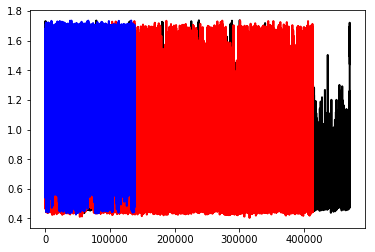

In [20]:
plt.plot(twist3m,c='k',lw=2)
plt.plot(twist3p,c='r',lw=2)
plt.plot(twist3pm,c='b',lw=2)
plt.show()
plt.close()

In [63]:
distance = np.loadtxt('Distance')

In [108]:
distance3 = distance[macrostate_traj-1]

In [111]:
distance3[roll_plus].max()

0.52732366

In [72]:
d3pm = distance3[roll_pm]

In [13]:
#Index files for processing the original trajectory
with open('S3_roll_minus.ndx',"w+") as f:
    f.write('[ State 1 ]\n')
    for k in roll_minus:
        f.write(str(k+1)+"\n")
f.close()

with open('S3_roll_plus.ndx',"w+") as f:
    f.write('[ State 1 ]\n')
    for k in roll_plus:
        f.write(str(k+1)+"\n")
f.close()

with open('S3_roll_plus_minus.ndx',"w+") as f:
    f.write('[ State 1 ]\n')
    for k in roll_pm:
        f.write(str(k+1)+"\n")
f.close()

with open('S3_roll_minus_plus.ndx',"w+") as f:
    f.write('[ State 1 ]\n')
    for k in roll_mp:
        f.write(str(k+1)+"\n")
f.close()

In [51]:
#Index files for processing the S3 trajectory

roll_plus = []
roll_minus = []
roll3 = roll[:,1][macrostate_traj - 1]
for k in range(len(roll3)):
    if roll3[k] >= 0:
        roll_plus.append(k)
    else:
        roll_minus.append(k)

roll_plus = np.array(roll_plus)
roll_minus = np.array(roll_minus)
        
with open('S3_roll_minus.ndx',"w+") as f:
    f.write('[ State 1 ]\n')
    for k in roll_minus:
        f.write(str(k+1)+"\n")
f.close()

with open('S3_roll_plus.ndx',"w+") as f:
    f.write('[ State 1 ]\n')
    for k in roll_plus:
        f.write(str(k+1)+"\n")
f.close()

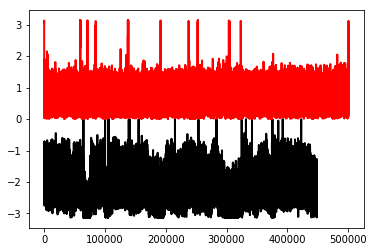

In [52]:
plt.plot((roll3[roll_minus]),c='k',lw=2)
plt.plot((roll3[roll_plus]),c='r',lw=2)
plt.show()
plt.close()

In [3]:
twist = np.load('Twist.npy')

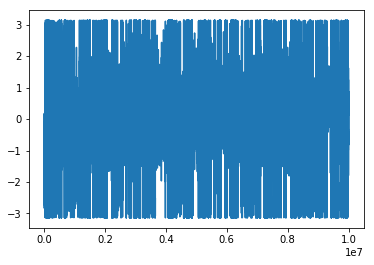

In [5]:
plt.plot(twist)
plt.show()
plt.close()

87.92884140607906 24.190347438316568


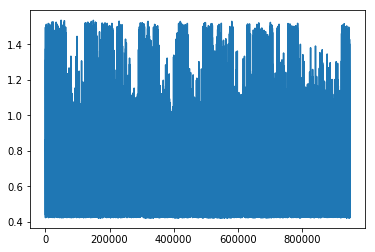

In [57]:
print(np.rad2deg(twist[macrostate_traj - 1].max()),np.rad2deg(twist[macrostate_traj - 1].min()))
plt.plot(twist[macrostate_traj - 1])
plt.show()
plt.close()

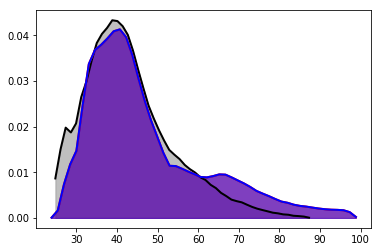

In [6]:
histo,bins = np.histogram(np.rad2deg(twist[macrostate_traj1000 - 1]),bins=50)

dx = bins[1] - bins[0]
histo = histo/(dx*histo.sum())
bins = (bins[1:] + bins[:-1])/2
plt.plot(bins,histo,lw=2,c='k')
plt.fill_between(bins,0,histo,color='grey',alpha=0.5)


twist2 = np.loadtxt('3/Twist')
histo,bins = np.histogram(np.rad2deg(twist2),bins=50)

dx = bins[1] - bins[0]
histo = histo/(dx*histo.sum())
bins = (bins[1:] + bins[:-1])/2
plt.plot(bins,histo,lw=2,c='r')
plt.fill_between(bins,0,histo,color='r',alpha=0.5)
#plt.show()
#plt.close()

histo,bins = np.histogram(np.rad2deg(twist[macrostate_traj - 1]),bins=50)

dx = bins[1] - bins[0]
histo = histo/(dx*histo.sum())
bins = (bins[1:] + bins[:-1])/2
plt.plot(bins,histo,lw=2,c='b')
plt.fill_between(bins,0,histo,color='b',alpha=0.5)
plt.show()
plt.close()

In [8]:
np.rad2deg(np.mean(twist2))

47.25343443901733

In [8]:
print(len(twist[macrostate_traj - 1]),len(twist2))

949506 1023278


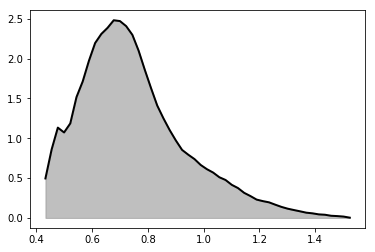

In [63]:
histo,bins = np.histogram(twist[macrostate_traj - 1],bins=50)

dx = bins[1] - bins[0]
histo = histo/(dx*histo.sum())
bins = (bins[1:] + bins[:-1])/2
plt.plot(bins,histo,lw=2,c='k')
plt.fill_between(bins,0,histo,color='grey',alpha=0.5)
plt.show()
plt.close()